# LDA & QDA From Scratch

# LDA

LDA (Linear Discriminent Analysis) is a **supervised** learning technique that can be used for classification and/or dimensionality reduction. 

There seem to be two main ways to introduce LDA, which correspond to Fisher's (1936) original approach and Welch's (1939) later derivation. I'll start by considering Fisher's approach, which seems to avoid (or at least hides?) many of the assumptions. 

A lot of peeople introduce LDA by likening it to PCA, an unsupervised dimensionality reduction algorithm for finding the directions of greatest variance in a dataset. The main difference is that LDA uses the class labels (thus making it supervised learning) to find the directions (or combinations of attributes, if you prefer) that give the greatest separation *between classes*. 

Let's consider the simple case of two classes, and an $n$-dimensional input vector $\mathbf{x}$. We hope to project that vector down to one dimension using $y=\mathbf{w}^T \mathbf{x}$ with the appropriate weights $\mathbf{w}$, which we hope to find. But how do we find this projection/direction that maximizes separability?

One way to achieve this is by maximizing the following quanitity:

$$
\frac{\text{Variance Between Classes}}{\text{Variance Within Classes}}
$$

So let's find expressions for the numerator and the denominator. To write these variances, we will make use of the covariance matrix.

To set things up, let's say I have a class $C_i$. To find the covariance matrix, I will require the sample mean over all features for the samples in $C_i$, which is an $n\times 1$ matrix:

$$
\mathbf{\mu}_i = \frac{1}{N_i}\sum_{\mathbf{x} \in C_i} \mathbf{x}
$$

The sample covariance matrix for the class $C_i$ can then be defined succinctly as an outer product:

$$
S_i = \frac{1}{N_i}\sum_{\mathbf{x} \in C_i} (\mathbf{x} - \mathbf{\mu_i})(\mathbf{x} - \mathbf{\mu_i})^T
$$

which is a symmetric, positive definite, $n\times n$ matrix. The $j,j$ entry of $S_i$ is the variance of the $j^{th}$ feature of the samples in class $i$. The $j,k$ entry meanwhile is the covariance between the $j^{th}$ and $k^{th}$ features of the class $i$ samples.

But remember, what we really care about are the variance between and within classes *once the data has been projected*. And we seek the projection that makes the ratio of the two as great as possible. Once projected, the mean of the projected features is in class $C_i$ is $y=\mathbf{w}^T \mathbf{\mu_i}$. The variance of the projected samples, meanwhile, can be written as $y=\mathbf{w}^T S_i \mathbf{w}$. Let's take a look at why this is.

$$
y=\mathbf{w}^T S_i \mathbf{w} = \frac{1}{N_i}\sum_{\mathbf{x} \in C_i} \mathbf{w}^T(\mathbf{x} - \mathbf{\mu_i})(\mathbf{x} - \mathbf{\mu_i})^T \mathbf{w} = S_i \mathbf{w} = \frac{1}{N_i}\sum_{\mathbf{x} \in C_i} \left[\mathbf{w}^T(\mathbf{x} - \mathbf{\mu_i})\right]^2 \geq 0
$$

where the last step can be confirmed by noting that $\mathbf{x} \cdot \mathbf{y} = \mathbf{x}^T \mathbf{y} = (\mathbf{x}^T \mathbf{y})^T = \mathbf{y}^T \mathbf{x}$ From this, we confirm that $S_i$ is positive definite, which implies the matrix is non-singular (a useful fact later). But why does this expression equal the variance of the projected samples? Let's do a little more rearranging...

$$
\frac{1}{N_i}\sum_{\mathbf{x} \in C_i} \left[\mathbf{w}^T(\mathbf{x} - \mathbf{\mu_i})\right]^2 = \frac{1}{N_i}\sum_{\mathbf{x} \in C_i} \left[\mathbf{w}^T\mathbf{x} - \mathbf{w}^T\mathbf{\mu_i}\right]^2
$$

where $\mathbf{w}^T\mathbf{x}$ is our projected sample and $\mathbf{w}^T\mathbf{\mu_i}$ is our projected mean. Thus, our expression is the sum of the squared deviations from the mean, which is just the variance!

Now let's get an expression for the Variance Within Classes or "within-class scatter" of the projected samples. This value is simply the sum of the within-class variances for all classes $i$: $\sum_{i} \mathbf{w}^T S_i \mathbf{w} = \mathbf{w}^T (\sum_{i}S_i) \mathbf{w} = \mathbf{w}^T S_W \mathbf{w}$, where we pulled through the sum using the distributive property of matrix multiplication. For our example of simply two classes, we write this as $\mathbf{w}^T S_0 \mathbf{w} + \mathbf{w}^T S_1 \mathbf{w}$ or $\mathbf{w}^T S_W \mathbf{w}$ where $S_W = S_1 + S_2$.

For the Variance between classes or "between-class scatter", we take a slightly different approach. We set $w$ such that the difference between the prjected means is large. We can write the distance between the means of the two classes as follows:

$$
\left\lVert \mathbf{w}^T\mathbf{\mu_0} - \mathbf{w}^T\mathbf{\mu_1}\right\rVert^2 = \left\lVert \mathbf{w}^T(\mathbf{\mu_0} - \mathbf{\mu_1})\right\rVert^2 = \left\lVert (\mathbf{\mu_0} - \mathbf{\mu_1})^T \mathbf{w}\right\rVert^2 = ((\mathbf{\mu_0} - \mathbf{\mu_1})^T \mathbf{w})^T((\mathbf{\mu_0} - \mathbf{\mu_1})^T \mathbf{w}) = \mathbf{w}^T (\mathbf{\mu_0} - \mathbf{\mu_1}) (\mathbf{\mu_0} - \mathbf{\mu_1})^T \mathbf{w}
$$

where we can view $(\mathbf{\mu_0} - \mathbf{\mu_1})(\mathbf{\mu_0} - \mathbf{\mu_1})^T$ as a between-class covariance matrix $S_B$. Therfore, the within-class scatter may be written more simply as $ \mathbf{w}^T S_B \mathbf{w}$

Thus, we finally arrive at an expression for the separation $s(\mathbf{w})$:

$$
s(\mathbf{w}) = \frac{\mathbf{w}^T S_B \mathbf{w}}{\mathbf{w}^T S_W \mathbf{w}} = \frac{\mathbf{w}^T (\mathbf{\mu_0} - \mathbf{\mu_1}) (\mathbf{\mu_0} - \mathbf{\mu_1})^T \mathbf{w}}{\mathbf{w}^T S_0 \mathbf{w} + \mathbf{w}^T S_1 \mathbf{w}}
$$

where the last equality is for our simple 2 class example. To find the optimum $\mathbf{w}$ we need to take gradient $\nabla s(\mathbf{w})$ and see where it vanishes. This matrix calculus can get pretty bad, so feel free to skip it, but I will try to provide a short intro in an aside.

#### Aside: Taking the gradient of $s(\mathbf{w})$ ####

To start, let's look at the gradient of the general expression $\mathbf{x}^T \mathbf{A} \mathbf{x}$, where $\mathbf{x}$ is an $n \times 1$ vector, and $\mathbf{A}$ is an $n \times n$ matrix.

We know that the quadratic form $\mathbf{x}^T \mathbf{A} \mathbf{x}$ will equal some constant, let's call it $\alpha$. Breaking apart the expression, we can get the following relation:

$$
\alpha = \mathbf{x}^T \mathbf{A} \mathbf{x} = \mathbf{x}^T (\mathbf{A} \mathbf{x}) = \sum_{i=1}^n x_i (\mathbf{A} \mathbf{x})_i = \sum_{i=1}^n x_i \sum_{j=1}^n a_{ij}x_j = \sum_{i=1}^n \sum_{j=1}^n a_{ij}x_ix_j
$$

We now differentiate $\alpha$ with respect to the vector $\mathbf{x}$, which will give us a $1 \times n$ row vector. If this size confuses you, I highly suggest [this reference](https://atmos.washington.edu/~dennis/MatrixCalculus.pdf), which is an excellent resource on matrix calculus. The main point is that $\frac{d\mathbf{x}}{d\alpha}$ is a column vector, while $\frac{d\alpha}{d\mathbf{x}}$ is a row vector by convention. Let's carry out the differentiation below by taking the derivative with respect to one element of $\mathbf{x}$, $x_k$:

$$
\frac{d\alpha}{d x_k} = \frac{d}{dx_k}\sum_{i=1}^n \sum_{j=1}^n a_{ij}x_ix_j = \sum_{i=1}^n a_{ik}x_i + \sum_{j=1}^n a_{kj}x_j
$$

The summation term on the left  comes about by considering when $j=k$ and the summation term on the right comes about when $i=k$ is considered. Let's first focus on the left term $\sum_{i=1}^n a_{ik}x_i$. This term is the dot product of the $k^{th}$ column of $\mathbf{A}$ with $x$. And since we want our results to be row vectors, we can write it as the $k^{th}$ element of the row vector $(\mathbf{x}^T \mathbf{A})_k$. The second term $\sum_{j=1}^n a_{kj}x_j$ is just the dot product of the $k^{th}$ row of $\mathbf{A}$ with $\mathbf{x}$. This is simply $(\mathbf{A} \mathbf{x})_k$, but since we want it as a row vector, we take the transpose to get $(\mathbf{x}^T \mathbf{A}^T)_k$.

Thus we arrive at the following expression:

$$
\frac{d\alpha}{d x_k} = \sum_{i=1}^n a_{ik}x_i + \sum_{j=1}^n a_{kj}x_j = (\mathbf{x}^T \mathbf{A})_k + (\mathbf{x}^T \mathbf{A}^T)_k = (\mathbf{x}^T \mathbf{A} + \mathbf{x}^T \mathbf{A}^T)_k = (\mathbf{x}^T (\mathbf{A} + \mathbf{A}^T))_k
$$

Or writing it for not just one element:

$$
\frac{d \mathbf{x}^T \mathbf{A} \mathbf{x}}{d \mathbf{x}} = \mathbf{x}^T (\mathbf{A} + \mathbf{A}^T)
$$

which just simplifies to $2\mathbf{x}^T\mathbf{A}$, if the matrix is symmetric (as our covariance matrices are).

So now we are left to differentiate our expression as follows:

$$
\frac{d s(\mathbf{w})}{d\mathbf{w}} = \frac{d}{d\mathbf{w}}\frac{\mathbf{w}^T S_B \mathbf{w}}{\mathbf{w}^T S_W \mathbf{w}}
$$

Using the quotient rule:

$$
\frac{d}{d\mathbf{w}}\frac{\mathbf{w}^T S_B \mathbf{w}}{\mathbf{w}^T S_W \mathbf{w}} = \frac{(\mathbf{w}^T S_B \mathbf{w})(2\mathbf{w}^T S_W) - (\mathbf{w}^T S_W \mathbf{w})(2\mathbf{w}^T S_B)}{(\mathbf{w}^T S_B \mathbf{w})^2} \stackrel{\text{set}}{=}0 \\
\implies \mathbf{w}^T S_W = \left(\frac{\mathbf{w}^T S_W \mathbf{w}}{\mathbf{w}^T S_B \mathbf{w}}\right)\mathbf{w}^T S_B
$$

To clean this expression up, I know that the ratio $\frac{\mathbf{w}^T S_W \mathbf{w}}{\mathbf{w}^T S_B \mathbf{w}}$ is just some scalar I will call $K$. We do this because we really only care about the direction of $\mathbf{w}$ and not it's magnitude. I will also take the transpose of the expression to get an equation for $\mathbf{w}$ and not $\mathbf{w}^T$. 

$$
\mathbf{w}^T S_W = K \mathbf{w}^T S_B \\
\implies  S_W \mathbf{w} = K  S_B \mathbf{w}\\
\implies  \mathbf{w} = K  S^{-1}_W S_B \mathbf{w}\\
\text{For two classes:}
\implies \mathbf{w} = K  (S_1 + S_2)^{-1} (\mathbf{\mu_0} - \mathbf{\mu_1})(\mathbf{\mu_0} - \mathbf{\mu_1})^T \mathbf{w}\\
$$

We recognize that $(\mathbf{\mu_0} - \mathbf{\mu_1})^T \mathbf{w}$ is also a scalar that can be absorbed into the constant, and finally discover the direction of $w$:

#### End Aside ####

$$
w \propto (S_1 + S_2)^{-1} (\mathbf{\mu_0} - \mathbf{\mu_1})
$$

Using the $\mathbf{w}$ above, we can indeed get a direction of maximum separation. If we further assume that $S_0 = S_1 = S$, that is the covariance matrices are the same for all classes, then we get "Linear Discriminat Analysis." In this case, we set $\mathbf{w} = (S)^{-1} (\mathbf{\mu_0} - \mathbf{\mu_1})$ (since we don't care about scaling). A threshold for discrimination is then usually chosen based on the distribution of the projected samples. A popular choice for the bias $b$ is the midpoint between the means, $b = \mathbf{w}^T (\frac{\mathbf{\mu_0} + \mathbf{\mu_1}}{2}) =\frac{1}{2} (\mathbf{\mu_0} - \mathbf{\mu_1})^T (S)^{-1} (\mathbf{\mu_0} - \mathbf{\mu_1})$. 

However, often maximum likelihood methods will be used to model the samples from each class as coming from a Gaussian distribution. From these arguments, one can then find optimum thresholds using Bayesian arguments.

#### One other way of viewing the equation ####
(From Pattern Classification, Duda)

When we get to the equation below: 

$$
S_W \mathbf{w} = K  S_B \mathbf{w}\\ \\
$$

We can replace the constant value $\frac{1}{K}$ with $\lambda$ and recognize that this is a generalized eigenvalue problem.

$$
S_B \mathbf{w} = \lambda  S_W \mathbf{w}\\ \\
$$

In the event that $S_W$ is invertible, we arrive at the more typical eigenvalue problem:

$$
S_W^{-1}S_B \mathbf{w} = \lambda  \mathbf{w}\\ \\
$$

Recognizing that $S_B\mathbf{w}$ is in the direction of $(\mathbf{\mu_0} - \mathbf{\mu_1})$, we get to our desired answer from before. 
### Multiple Classes ###

Often we care about classifying more than just two classes. If we say there are $M$ classes $C_1,...,C_M$, there are a couple of ways to handle the problem. The first is more simple and involves using methods that work with just two classes, as before.

These methods are mainly *Ove vs Rest* (OvR) and *One vs One* (OvO). In OvR, $M$ different binary classifiers are constructed. Each classifier works by attempting to discriminate between the the samples in $C_i$ and all of the other samples in $C_{\neq i}$. The scores from each classifier are then aggregated in an appropriate way so as to predict the actual class of the sample. However, this method can be problematic because properly aggregating the scores can be difficult (calibration between different classifiers is needed) and the number of samples in $C_i$ is often quite small compared to the rest of the samples in $C_{\neq i}$.

In (OvO), ${M}\choose{2}$ classifiers are trained between each pair of classes. Each classifier then votes on the identity of the sample. The sample is then labeled with whichever class gets the most votes (must handle case when gets equal number of votes.

#### Generalizing the linear discriminant multiple classes and higher dimensions ####

Alternatively, we can generalize our earlier analysis to multiple classes. Instead of seeking to project the two classes down to a one dimensional space, we now have $M$ classes and will use $M-1$ discriminant functions to project our $n$-dimensional input space down to a $M-1$ dimensional space. Throughout this analysis we will assume that $n \geq M$.

The projection of the $n$ dimensional data to the $M-1$ dimensional space will requires $M-1$ discriminants:

$$
y_i = \mathbf{w}_i^T \mathbf{x},  \hspace{1cm} i=1,...,M-1
$$

Conveniently, we can then put this in terms of matrices

$$
\mathbf{y} = \mathbf{W}^T \mathbf{x}
$$

where $\mathbf{W}$ is an $n \times (M-1)$ matrix, with the $i^{th}$ column of $\mathbf{W}$ being equal to $\mathbf{w}_i$.

We must now generalize the within and between class scatter matrices to multiple classes. We start with the within-class scatter matrix because it is very similar in form to our earlier $S_W$. Again we define $S_W$ as follows:

$$
S_W = \sum_{i}^M S_i = \sum_{i}^M \frac{1}{N_i}\sum_{\mathbf{x} \in C_i} (\mathbf{x} - \mathbf{\mu_i})(\mathbf{x} - \mathbf{\mu_i})^T\\
$$

where $\mathbf{\mu_i} = \frac{1}{N_i}\sum_{\mathbf{x} \in C_i} \mathbf{x}$ is again the mean of the samples in class $i$.

A bit more work must be done to extend the "between-class scatter" matrix to multiple classes. Following Bishop (2006) who follows Duda and Hart's convention (1973), we will start by defining the total covariance matrix $S_T$:

$$
S_T = \sum_{\mathbf{x}} (\mathbf{x}-\mathbf{\mu})(\mathbf{x}-\mathbf{\mu})^T
$$

where $\mathbf{\mu}$ is now the mean of all $N$ data points:

$$
\mathbf{\mu} = \frac{1}{N} \sum_{\mathbf{x}} \mathbf{x} = \frac{1}{N} \sum_{C_i} N_i\mathbf{\mu}_i 
$$

Note that $N_i$ is just the number of samples in class $C_i$. Now being clever, we can write out $S_T$ in terms of quantities that we will recognize. One is simply $S_W$ and we will call the other quantity $S_B$:

$$
\left.\begin{aligned} { S } _ { T } & = \sum _ { i = 1 } ^ { M } \sum _ { \mathbf { x } \in \mathcal { C } _ { i } } \left( \mathbf { x } - \mathbf { \mu } _ { i } + \mathbf { \mu } _ { i } - \mathbf { \mu } \right) \left( \mathbf { x } - \mathbf { \mu } _ { i } + \mathbf { \mu } _ { i } - \mathbf { \mu } \right) ^ { T } \\ 
& = \sum _ { i = 1 } ^ { M } \sum _ { \mathbf { x } \in \mathcal { C } _ { i } } \left( \mathbf { x } - \mathbf { \mu } _ { i } \right) \left( \mathbf { x } - \mathbf { \mu } _ { i } \right) ^ { T } + \sum _ { i = 1 } ^ { M } \sum _ { \mathbf { x } \in \mathcal { C } _ { i } } \left( \mathbf { \mu } _ { i } - \mathbf { \mu } \right) \left( \mathbf { \mu } _ { i } - \mathbf { \mu } \right) ^ { T } \\ 
& =  { S } _ { W } + \sum _ { i = 1 } ^ { M } N _ { i } \left( \mathbf { \mu } _ { i } - \mathbf { \mu } \right) \left( \mathbf { \mu } _ { i } - \mathbf { \mu } \right) ^ { T } = S_W + S_B \end{aligned} \right.
$$

Now that we again have expressions for $S_W$ and $S_B$, we once again hope to maximize the variance between classes in our projected space over the variance within classes in the projected space. Using $\tilde{S}_W$ and $\tilde{S}_B$ to denote the scatter matrices *of the projected samples*, we can see the following:

$$
\tilde{S}_W = \mathbf{W}^T S_W \mathbf{W} \\ 
\tilde{S}_B = \mathbf{W}^T S_B \mathbf{W}
$$

where $\tilde{S}_W$ and $\tilde{S}_B$ are $(M-1) \times (M-1)$ matrices. (See Duda and Hart for more information on these transformed scatter matrices).

It turns out we commonly attempt to maximize the quotient of the determinants as shown below:

$$
J(\mathbf{W}) = \frac{|\mathbf{W}^T S_B \mathbf{W}|}{|\mathbf{W}^T S_W \mathbf{W}|}
$$

This is a sesible thing to do since the determinant is equal to the product of the eigenvalues, which give a measure of the variances. Therefore, a large determinant indicates large variances in the directions of focus. One can also use the trace, since it is equal to the sum of the eigenvalues.

Finally, it can be shown that weights are determined by the eigenvectors of $S_W^{-1}S_B$ that correspond to the $M-1$ largest eigenvalues!

One last note: The reason we can cannot find more than $M-1$ weights or linear discriminants is that $S_B$ is the sum or outer product matrices, which are rank 1. Due to the constraints on $S_B$ at most $M-1$ of the summed matrices are indipendant, so $S_B$ has a maximum rank of $M-1$. This also means it has a maximum of $M-1$ nonzero eigenvalues.

### The Procedure for Dimensionality Reduction ###

Using the above information, we can arrive at a step-wise procedure for dimensionality reduction using LDA.
(Please note that I am deriving much of the code from Raschka's nice book, *Python Machine Learning*.
0. Standardize the data.
1. Find the scatter matrices
2. Find the eigenvectors and corresponding eigenvalues of $S_W^{-1}S_B$
3. Sort the eigenvectors by decreasing eigenvalue, and keep the eigenvectors that correspond to $D$ largest eigenvalues (where $D$ is the dimension of the desired reduced subspace).
4. Construct the $n \times D$ matrix $\mathbf{W}$, where the columns of the matrix are the previously computed eigenvectors.
5. Use $W$ to transform the data.

Let's practice the procedure on a nice easy example using our old friend, the Iris dataset.

In [10]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
df = sns.load_dataset("iris")
df.head()

# df = pd.read_csv('https://archive.ics.uci.edu/ml/'
#         'machine-learning-databases/iris/iris.data', header=None)
# df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's look at the data first:

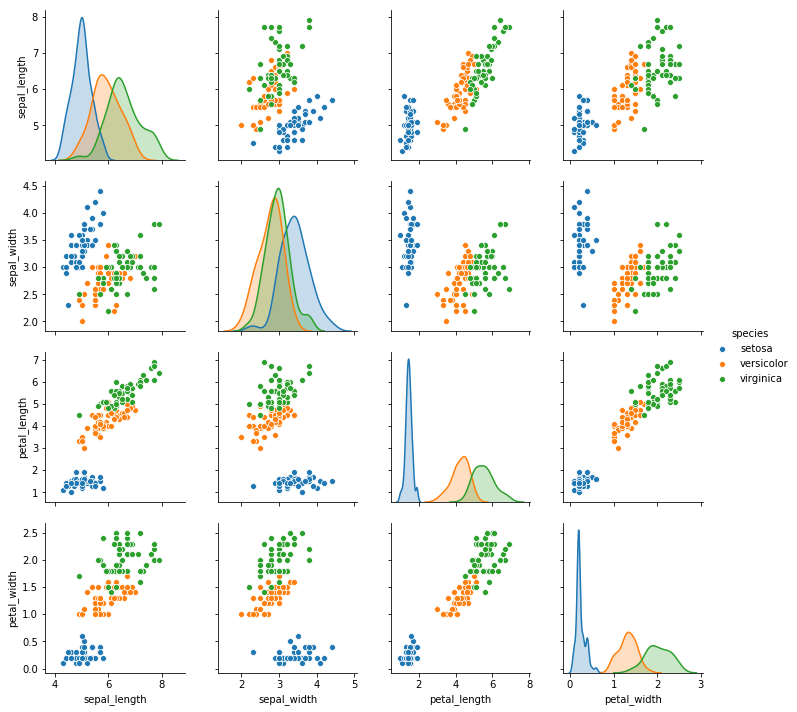

In [11]:
sns.pairplot(df, hue="species")

If you look at the diagonal plots, you see that no one feature provides perfect discrimination. petal_length and petal_width do alright, but we can do better using LDA.

Let's use LDA as dimensionality reduction. We will start by making our training and test sets, then standardizing the data.

In [34]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 0:4].values, df.iloc[:, 4].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

In [35]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Let's now make an LDA object, in the style of SKlearn.

In [70]:
class LDA(object):
    """LDA for discriminant analysis

    Parameters
    ------------
    num_components : int
        The number of linear discriminant to keep. 
        Equal to the number of eigenvectors we keep.

    Attributes
    -----------
    evals_ : list of eigenvalues
    evecs_ : list of eigenvectors
    W_ : transformation Matrix

    """
    
    
    def __init__(self, num_components):
        self.num_components = num_components
        
    def fit(self, X, y): 
        """Fit training data and project to lower dimensional subspace.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        
        S_W = self._compute_S_W(X,y)
        S_B = self._compute_S_B(X,y)
        evals_list, evecs_list = self._compute_evecs_and_evals(S_W, S_B)
        self.W_ = self._make_W(evecs_list)
        
        return self
        
    def _compute_class_mean_vecs(self, X, y):
        mean_vecs = []
        for idx, label in enumerate(np.unique(y)):
            mean_vecs.append(np.mean(
                X[y==label], axis=0))
        
        return mean_vecs
        
    def _compute_S_W(self, X, y):
        """Compute the within-class scatter matrix
        
        Note: Here we are using the scaled-within class matrix.
        We do this because there may be a large class imbalance.
        In this case, S_W = (1/N_i)*S_i. (scale it by class size)
        Thus S_W is just the sum of the within-class covariance matrices.
        """
        d = X.shape[1]  # number of features
        S_W = np.zeros((d, d))
        for label in np.unique(y):
            class_scatter = np.cov(X[y == label].T)
            S_W += class_scatter
        return S_W
    
    def _compute_S_B(self, X, y):
        """Compute the between-class scatter matrix"""
        overall_mean = np.mean(X, axis=0)
        class_mean_vecs = self._compute_class_mean_vecs(X,y)
        d = X.shape[1]  # number of features
        S_B = np.zeros((d, d))
        for idx, label in enumerate(np.unique(y)):
            N_i = X[y == label, :].shape[0]
            mean_vec_i = class_mean_vecs[idx].reshape(d, 1)  # make column vector
            overall_mean_vec = overall_mean.reshape(d, 1)  # make column vector
            S_B += N_i * (mean_vec_i - overall_mean_vec).dot((mean_vec_i - overall_mean_vec).T)
            
        return S_B
        
    def _compute_evecs_and_evals(self, S_W, S_B):
        evals, evecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
        
        # Make a list of (eigenvalue, eigenvector) tuples
        e_pairs = [(np.abs(evals[i]), evecs[:, i])
               for i in range(len(evals))]

        # Sort the (eigenvalue, eigenvector) tuples from high to low
        e_pairs = sorted(e_pairs, key=lambda k: k[0], reverse=True)
        
        evals_list = [x[0] for x in e_pairs]
        evecs_list = [x[1] for x in e_pairs]
        
        self.evals_ = evals_list
        self.evecs_ = evecs_list
        
        return evals_list, evecs_list
    
    def _make_W(self, evecs_list):
        evecs_vectors_list = [x[:, np.newaxis].real for x in evecs_list]
        W = np.hstack(tuple(evecs_vectors_list[0:self.num_components]))
        return W
    
    def transform(self, X):
        transformed_X = np.dot(X,self.W_)
        return transformed_X
    
    def get_W(self):
        return self.W_
    
    def get_eigenvalues(self):
        return self.evals_
        

Now we can fit and transform the data down two dimensions!

In [71]:
lda = LDA(num_components=2).fit(X_train_std,y_train)
lda_X = lda.transform(X_train_std)

Let's plot it and see how it does:

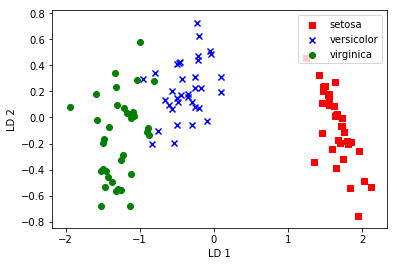

In [74]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for flower, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(lda_X[y_train == flower, 0],
                lda_X[y_train == flower, 1], #* (-1),
                c=c, label=flower, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='upper right')

We can also plot the associated eigenvalues for the discriminants. Roughly, each eigenvalue corresponds to the amount of discrimination in that direction, so the plot can help us determined how many dimensions are useful for projection.

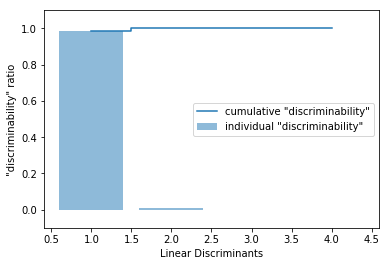

In [76]:
evals = lda.get_eigenvalues()
tot = sum(evals)
discr = [(i / tot) for i in sorted(evals, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1,len(evals)+1), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1,len(evals)+1), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')

As you can see, the first linear discrimiant provides most of the discrimination and is really all we need:

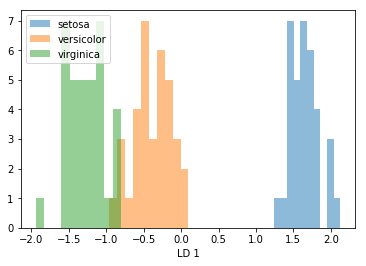

In [83]:
for flower in np.unique(y_train):
    plt.hist(lda_X[y_train == flower, 0], label=flower, alpha=0.5)

plt.xlabel('LD 1')
plt.legend(loc='best')

In [77]:
L

[985.8112506155883,
 11.457789172036431,
 1.1374554827128e-13,
 7.711235074671397e-14]

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

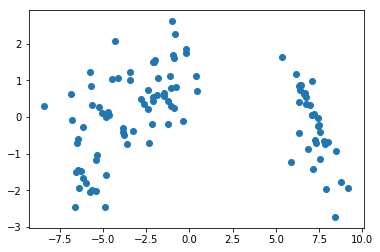

In [62]:
plt.scatter(X_train_lda[:,0], X_train_lda[:,1])